## Gym Usage Analysis

# Task 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
hietaniemi_gym_data_df = pd.read_csv('hietaniemi-gym-data.csv')

#### Show Top 5 Records

In [3]:
hietaniemi_gym_data_df.head(5)

,time,19,20,21,22,23,24,25,26
0,2020-04-24 00:00:00+00:00,2,2,2,2,2,2,2,2
1,2020-04-24 00:10:00+00:00,2,2,2,2,2,2,2,2
2,2020-04-24 00:20:00+00:00,2,2,2,2,2,2,2,2
3,2020-04-24 00:30:00+00:00,2,2,2,2,2,2,2,2
4,2020-04-24 00:40:00+00:00,2,2,2,2,2,2,2,2


#### Shape of the dataset

In [4]:
hietaniemi_gym_data_df.shape

(55102, 9)

### Aggrigated Hourly Usage

In [5]:
import pandas as pd

# Assuming 'df' is your DataFrame and it's already loaded with data
# First, ensure the 'time' column is in datetime format
hietaniemi_gym_data_df['time'] = pd.to_datetime(hietaniemi_gym_data_df['time'])

# Set the 'time' column as the DataFrame index
hietaniemi_gym_data_df.set_index('time', inplace=True)

# Aggregate the data to hourly precision by summing up the values in each column
# 'H' stands for hourly frequency
hietaniemi_gym_data_df_hourly = hietaniemi_gym_data_df.resample('H').sum()

# Reset the index if you want 'time' back as a column
hietaniemi_gym_data_df_hourly.reset_index(inplace=True)
hietaniemi_gym_data_df.reset_index(inplace=True)

# Display the first few rows of the aggregated DataFrame
print(hietaniemi_gym_data_df_hourly.head(10))

                       time  19  20  21  22  23  24  25  26
0 2020-04-24 00:00:00+00:00  12  12  12  12  12  12  12  12
1 2020-04-24 01:00:00+00:00  12  12  12  12  12  12  12  12
2 2020-04-24 02:00:00+00:00  12  12  12  14  12  13  12  13
3 2020-04-24 03:00:00+00:00  13  14  15  12  18  20  23  20
4 2020-04-24 04:00:00+00:00  24  15  23  24  19  25  30  28
5 2020-04-24 05:00:00+00:00  19  15  18  12  19  20  28  18
6 2020-04-24 06:00:00+00:00  36  28  34  25  28  30  30  34
7 2020-04-24 07:00:00+00:00  28  26  24  22  26  31  26  26
8 2020-04-24 08:00:00+00:00  32  25  25  21  34  30  44  33
9 2020-04-24 09:00:00+00:00  35  28  37  33  40  44  41  32


# Task 2

In [6]:
import pandas as pd
import pytest

# Tests
def test_row_count():
    assert len(hietaniemi_gym_data_df) > 50000, "The dataset should have more than 50,000 rows."

def test_date_range():
    assert hietaniemi_gym_data_df['time'].min() >= pd.Timestamp('2020-04-24', tz='UTC'), "The dataset should have records from 2020-04-24."
    assert hietaniemi_gym_data_df['time'].max() < pd.Timestamp('2021-05-12', tz='UTC'), "The dataset should have records up to 2021-05-11."


def test_positive_values():
    numeric_cols = hietaniemi_gym_data_df.select_dtypes(include=['number']).columns
    assert (hietaniemi_gym_data_df[numeric_cols] >= 0).all().all(), "All values in the numerical columns should be positive."

# Running tests
# Pytest can be invoked to run the tests, typically via command line
# In this notebook context, we invoke the test functions directly
test_row_count()
test_date_range()
test_positive_values()

# Task 3

In [7]:

import copy

# Task 3.1: Find the most popular device
hietaniemi_gym_data_df_hourly.set_index('time', inplace=True)
total_usage_per_device = hietaniemi_gym_data_df_hourly.sum().sort_values(ascending=False)
most_popular_device = total_usage_per_device.idxmax()
most_popular_device_usage = total_usage_per_device.max()
hietaniemi_gym_data_df_hourly.reset_index(inplace=True)

# Task 3.2: Impact of time of day on overall popularity
# Extract the hour from the index and calculate the mean usage per hour
average_usage_per_hour = hietaniemi_gym_data_df_hourly.groupby('time').mean().mean(axis=1)

# Task 3.3: Popularity on weekends vs weekdays
# Define a function to categorize weekdays and weekends
def categorize_day(day):
    if day.weekday() < 5:  # Monday=0, Sunday=6
        return 'weekday'
    else:
        return 'weekend'

# Apply the categorization function to create a new column
hietaniemi_gym_data_df_copy = copy.deepcopy(hietaniemi_gym_data_df)
hietaniemi_gym_data_df_copy['day_type'] = hietaniemi_gym_data_df_copy['time'].apply(categorize_day)

# Calculate the average for weekdays and weekends separately
avg_by_day_type = hietaniemi_gym_data_df_copy.groupby('day_type').mean()



most_popular_device, most_popular_device_usage, average_usage_per_hour, avg_by_day_type

('25',
 182532,
 time
 2020-04-24 00:00:00+00:00    12.000
 2020-04-24 01:00:00+00:00    12.000
 2020-04-24 02:00:00+00:00    12.500
 2020-04-24 03:00:00+00:00    16.875
 2020-04-24 04:00:00+00:00    23.500
                               ...  
 2021-05-11 11:00:00+00:00    12.000
 2021-05-11 12:00:00+00:00    12.000
 2021-05-11 13:00:00+00:00    12.000
 2021-05-11 14:00:00+00:00    12.250
 2021-05-11 15:00:00+00:00     8.000
 Length: 9184, dtype: float64,
                                         time        19        20        21  \
 day_type                                                                     
 weekday  2020-11-01 10:54:37.107635968+00:00  3.123376  2.950028  3.056620   
 weekend            2020-10-31 23:55:00+00:00  3.035669  2.926326  2.994571   
 
                 22        23        24        25        26  
 day_type                                                    
 weekday   2.898248  3.181601  2.710152  3.348963  2.707402  
 weekend   2.818497  3.068182  2.620

In [8]:
hietaniemi_gym_data_df_hourly

,time,19,20,21,22,23,24,25,26
0,2020-04-24 00:00:00+00:00,12,12,12,12,12,12,12,12
1,2020-04-24 01:00:00+00:00,12,12,12,12,12,12,12,12
2,2020-04-24 02:00:00+00:00,12,12,12,14,12,13,12,13
3,2020-04-24 03:00:00+00:00,13,14,15,12,18,20,23,20
4,2020-04-24 04:00:00+00:00,24,15,23,24,19,25,30,28
...,...,...,...,...,...,...,...,...,...
9179,2021-05-11 11:00:00+00:00,12,12,12,12,12,12,12,12
9180,2021-05-11 12:00:00+00:00,12,12,12,12,12,12,12,12
9181,2021-05-11 13:00:00+00:00,12,12,12,12,12,12,12,12
9182,2021-05-11 14:00:00+00:00,13,12,12,12,13,12,12,12


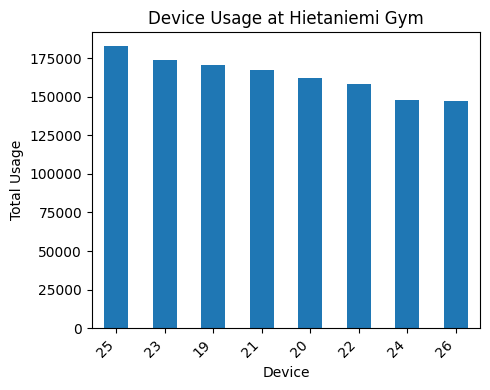

In [9]:
import matplotlib.pyplot as plt

try:
    hietaniemi_gym_data_df_hourly.reset_index(inplace=True)
    hietaniemi_gym_data_df_hourly.set_index('time', inplace=True)
except:
    pass

# Assuming 'total_usage_per_device' is already calculated as shown in your snippet
device_columns = ['19', '20', '21', '22', '23', '24', '25', '26']
# Calculate the sum usage per hour for each device
mean_usage_per_hour = hietaniemi_gym_data_df_hourly[device_columns].groupby(hietaniemi_gym_data_df_hourly.index.hour).sum()

# Plotting
plt.figure(figsize=(5, 4))
total_usage_per_device.plot(kind='bar')
plt.title('Device Usage at Hietaniemi Gym')
plt.xlabel('Device')
plt.ylabel('Total Usage')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()

<Figure size 500x400 with 0 Axes>

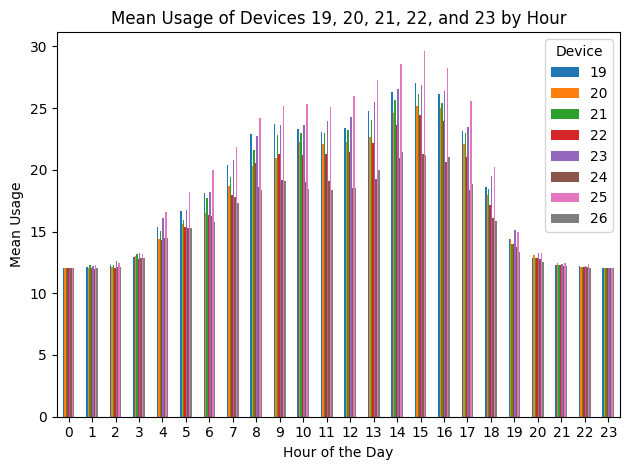

In [10]:
import matplotlib.pyplot as plt

# Calculate the mean usage per hour for each device
device_columns = ['19', '20', '21', '22', '23', '24', '25', '26']
mean_usage_per_hour = hietaniemi_gym_data_df_hourly[device_columns].groupby(hietaniemi_gym_data_df_hourly.index.hour).mean()

# Plotting
plt.figure(figsize=(5, 4))
mean_usage_per_hour.plot(kind='bar')
plt.title('Mean Usage of Devices 19, 20, 21, 22, and 23 by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Usage')
plt.xticks(range(0, 24), rotation=0)  # Hour labels from 0 to 23
plt.legend(title='Device')
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()

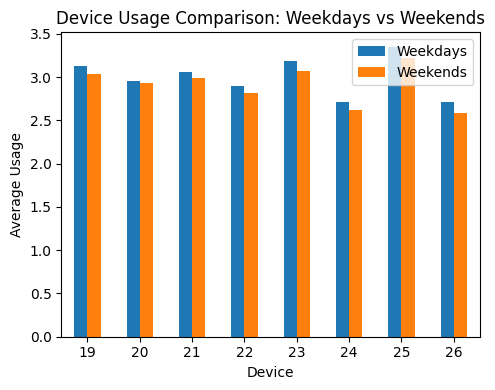

In [11]:
import matplotlib.pyplot as plt

# Assuming hietaniemi_gym_data_df has a datetime index
# Use the provided 'categorize_day' function to create a 'day_type' column
hietaniemi_gym_data_df_copy = copy.deepcopy(hietaniemi_gym_data_df)
hietaniemi_gym_data_df_copy['day_type'] = hietaniemi_gym_data_df_copy['time'].map(lambda x: categorize_day(x))

# Select only the device columns for weekdays and weekends
device_columns = ['19', '20', '21', '22', '23', '24', '25', '26']

# Calculate the sum of usage for each device on weekdays and weekends
weekdays_data = hietaniemi_gym_data_df_copy[hietaniemi_gym_data_df_copy['day_type'] == 'weekday'][device_columns].mean()
weekends_data = hietaniemi_gym_data_df_copy[hietaniemi_gym_data_df_copy['day_type'] == 'weekend'][device_columns].mean()

# Create a DataFrame to hold the aggregated data
aggregated_data = pd.DataFrame({'Weekdays': weekdays_data, 'Weekends': weekends_data})

# Plotting
aggregated_data.plot(kind='bar', figsize=(5, 4))
plt.title('Device Usage Comparison: Weekdays vs Weekends')
plt.xlabel('Device')
plt.ylabel('Average Usage')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()

# Task 4

In [12]:

try:
    hietaniemi_gym_data_df.reset_index(inplace=True)
except:
    pass


# Assuming 'df' is the DataFrame with the gym data
hietaniemi_gym_data_df['time'] = pd.to_datetime(hietaniemi_gym_data_df['time'], utc=True)

# 3. Add 'Sum of minutes across all gym devices' feature
# Assuming each row represents a 10-minute interval as per the previous context of the dataset
# Select only the device columns for weekdays and weekends
device_columns = ['19', '20', '21', '22', '23', '24', '25', '26']
hietaniemi_gym_data_df['sum_minutes'] = hietaniemi_gym_data_df[device_columns].sum(axis=1)

# 1. Add 'Weekday as number' feature
hietaniemi_gym_data_df['weekday'] = hietaniemi_gym_data_df['time'].dt.weekday

# 2. Add 'Hour as number' feature
hietaniemi_gym_data_df['hour'] = hietaniemi_gym_data_df['time'].dt.hour


# Display the first few rows to verify the new columns
hietaniemi_gym_data_df.head()

,index,time,19,20,21,22,23,24,25,26,sum_minutes,weekday,hour
0,0,2020-04-24 00:00:00+00:00,2,2,2,2,2,2,2,2,16,4,0
1,1,2020-04-24 00:10:00+00:00,2,2,2,2,2,2,2,2,16,4,0
2,2,2020-04-24 00:20:00+00:00,2,2,2,2,2,2,2,2,16,4,0
3,3,2020-04-24 00:30:00+00:00,2,2,2,2,2,2,2,2,16,4,0
4,4,2020-04-24 00:40:00+00:00,2,2,2,2,2,2,2,2,16,4,0


In [13]:

try:
    hietaniemi_gym_data_df_hourly.reset_index(inplace=True)
except:
    pass

# Assuming 'df' is the DataFrame with the gym data
hietaniemi_gym_data_df_hourly['time'] = pd.to_datetime(hietaniemi_gym_data_df_hourly['time'], utc=True)

# 3. Add 'Sum of minutes across all gym devices' feature
# Assuming each row represents a 10-minute interval as per the previous context of the dataset
device_columns = ['19', '20', '21', '22', '23', '24', '25', '26']
hietaniemi_gym_data_df_hourly['sum_minutes'] = hietaniemi_gym_data_df_hourly[device_columns].sum(axis=1)


# 1. Add 'Weekday as number' feature
hietaniemi_gym_data_df_hourly['weekday'] = hietaniemi_gym_data_df_hourly['time'].dt.weekday

# 2. Add 'Hour as number' feature
hietaniemi_gym_data_df_hourly['hour'] = hietaniemi_gym_data_df_hourly['time'].dt.hour


# Display the first few rows to verify the new columns
hietaniemi_gym_data_df_hourly.head()

,time,index,19,20,21,22,23,24,25,26,sum_minutes,weekday,hour
0,2020-04-24 00:00:00+00:00,0,12,12,12,12,12,12,12,12,96,4,0
1,2020-04-24 01:00:00+00:00,1,12,12,12,12,12,12,12,12,96,4,1
2,2020-04-24 02:00:00+00:00,2,12,12,12,14,12,13,12,13,100,4,2
3,2020-04-24 03:00:00+00:00,3,13,14,15,12,18,20,23,20,135,4,3
4,2020-04-24 04:00:00+00:00,4,24,15,23,24,19,25,30,28,188,4,4


# Task 5

In [14]:
weather_df = pd.read_csv('kaisaniemi-weather-data.csv')

# Display the first few rows 
weather_df.head()

,Year,Month,Day,Hour,Timezone,Precipitation (mm),Snow depth (cm),Temperature (degC)
0,2020,4,24,00:00,UTC,0.0,0.0,6.2
1,2020,4,24,01:00,UTC,0.0,0.0,6.2
2,2020,4,24,02:00,UTC,0.0,0.0,5.1
3,2020,4,24,03:00,UTC,0.0,0.0,4.6
4,2020,4,24,04:00,UTC,0.0,0.0,4.7


In [15]:
# First, let's make sure the Hour column is in a suitable format for pd.to_datetime()
# It needs to be of the format 'HH:MM:SS', so we will add ':00:00' to represent minutes and seconds
weather_df['Hour'] = weather_df['Hour'] + ':00'

# Now, let's combine Year, Month, Day, and the modified Hour into a single datetime column
weather_df['date'] = pd.to_datetime(weather_df['Year'].astype(str) + '-' +
                                    weather_df['Month'].astype(str).str.zfill(2) + '-' +
                                    weather_df['Day'].astype(str).str.zfill(2) + ' ' +
                                    weather_df['Hour'])

# Convert the 'datetime' column to UTC to match the gym data
weather_df['date'] = weather_df['date'].dt.tz_localize('UTC')

# Display the first few rows to confirm the 'date' column is correctly formatted
weather_df.head()

,Year,Month,Day,Hour,Timezone,Precipitation (mm),Snow depth (cm),Temperature (degC),date
0,2020,4,24,00:00:00,UTC,0.0,0.0,6.2,2020-04-24 00:00:00+00:00
1,2020,4,24,01:00:00,UTC,0.0,0.0,6.2,2020-04-24 01:00:00+00:00
2,2020,4,24,02:00:00,UTC,0.0,0.0,5.1,2020-04-24 02:00:00+00:00
3,2020,4,24,03:00:00,UTC,0.0,0.0,4.6,2020-04-24 03:00:00+00:00
4,2020,4,24,04:00:00,UTC,0.0,0.0,4.7,2020-04-24 04:00:00+00:00


In [16]:
hietaniemi_gym_data_df_hourly

,time,index,19,20,21,22,23,24,25,26,sum_minutes,weekday,hour
0,2020-04-24 00:00:00+00:00,0,12,12,12,12,12,12,12,12,96,4,0
1,2020-04-24 01:00:00+00:00,1,12,12,12,12,12,12,12,12,96,4,1
2,2020-04-24 02:00:00+00:00,2,12,12,12,14,12,13,12,13,100,4,2
3,2020-04-24 03:00:00+00:00,3,13,14,15,12,18,20,23,20,135,4,3
4,2020-04-24 04:00:00+00:00,4,24,15,23,24,19,25,30,28,188,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9179,2021-05-11 11:00:00+00:00,9179,12,12,12,12,12,12,12,12,96,1,11
9180,2021-05-11 12:00:00+00:00,9180,12,12,12,12,12,12,12,12,96,1,12
9181,2021-05-11 13:00:00+00:00,9181,12,12,12,12,12,12,12,12,96,1,13
9182,2021-05-11 14:00:00+00:00,9182,13,12,12,12,13,12,12,12,98,1,14


In [17]:
import pandas as pd

# Assuming 'weather_df' and 'df_hourly' are your two DataFrames.
# First, ensure that the 'date' and 'time' columns are in datetime format.
try:
    weather_df.reset_index(inplace=True)
    hietaniemi_gym_data_df_hourly.reset_index(inplace=True)
except:
    pass
weather_df['date'] = pd.to_datetime(weather_df['date'])
hietaniemi_gym_data_df_hourly['time'] = pd.to_datetime(hietaniemi_gym_data_df_hourly['time'])

# Now, if they are not already set as the index, set the datetime columns as the index.
weather_df.set_index('date', inplace=True)
hietaniemi_gym_data_df_hourly.set_index('time', inplace=True)

# Perform the join. This will join the DataFrames on their indices.
combined_df = pd.merge(weather_df, hietaniemi_gym_data_df_hourly, left_index=True, right_index=True, suffixes=('_weather', '_gym'))

# Reset the index if you want the date/time to be a column again.
combined_df.reset_index(inplace=True)

In [18]:
combined_df

,index,index_weather,Year,Month,Day,Hour,Timezone,Precipitation (mm),Snow depth (cm),Temperature (degC),...,20,21,22,23,24,25,26,sum_minutes,weekday,hour
0,2020-04-24 00:00:00+00:00,0,2020,4,24,00:00:00,UTC,0.0,0.0,6.2,...,12,12,12,12,12,12,12,96,4,0
1,2020-04-24 01:00:00+00:00,1,2020,4,24,01:00:00,UTC,0.0,0.0,6.2,...,12,12,12,12,12,12,12,96,4,1
2,2020-04-24 02:00:00+00:00,2,2020,4,24,02:00:00,UTC,0.0,0.0,5.1,...,12,12,14,12,13,12,13,100,4,2
3,2020-04-24 03:00:00+00:00,3,2020,4,24,03:00:00,UTC,0.0,0.0,4.6,...,14,15,12,18,20,23,20,135,4,3
4,2020-04-24 04:00:00+00:00,4,2020,4,24,04:00:00,UTC,0.0,0.0,4.7,...,15,23,24,19,25,30,28,188,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9179,2021-05-11 11:00:00+00:00,9179,2021,5,11,11:00:00,UTC,0.0,0.0,20.3,...,12,12,12,12,12,12,12,96,1,11
9180,2021-05-11 12:00:00+00:00,9180,2021,5,11,12:00:00,UTC,0.0,0.0,20.4,...,12,12,12,12,12,12,12,96,1,12
9181,2021-05-11 13:00:00+00:00,9181,2021,5,11,13:00:00,UTC,0.0,0.0,20.8,...,12,12,12,12,12,12,12,96,1,13
9182,2021-05-11 14:00:00+00:00,9182,2021,5,11,14:00:00,UTC,0.0,0.0,20.8,...,12,12,12,13,12,12,12,98,1,14


In [19]:
combined_df.isna().sum()

index                  0
index_weather          0
Year                   0
Month                  0
Day                    0
Hour                   0
Timezone               0
Precipitation (mm)    92
Snow depth (cm)       45
Temperature (degC)    13
level_0                0
index_gym              0
19                     0
20                     0
21                     0
22                     0
23                     0
24                     0
25                     0
26                     0
sum_minutes            0
weekday                0
hour                   0
dtype: int64

In [20]:
# A function to find the max series of NA values for a given column
def max_na_series(column):
    na_mask = column.isna()
    cumsum_mask = (~na_mask).cumsum()
    na_groups = na_mask.groupby(cumsum_mask).sum()
    max_na_series = na_groups.max()
    return max_na_series

# Apply the function to each column in the DataFrame
max_na_dict = {col: max_na_series(combined_df[col]) for col in combined_df.columns}
max_na_dict

{'index': 0,
 'index_weather': 0,
 'Year': 0,
 'Month': 0,
 'Day': 0,
 'Hour': 0,
 'Timezone': 0,
 'Precipitation (mm)': 74,
 'Snow depth (cm)': 18,
 'Temperature (degC)': 2,
 'level_0': 0,
 'index_gym': 0,
 '19': 0,
 '20': 0,
 '21': 0,
 '22': 0,
 '23': 0,
 '24': 0,
 '25': 0,
 '26': 0,
 'sum_minutes': 0,
 'weekday': 0,
 'hour': 0}

In [21]:
# Define a function to fill NaN values with the average of their neighboring columns
def fill_consecutive_na_with_avg(df, column):
    # Identify where NaN sequences start and end
    print(df)
    na_positions = df[column].isna()
    # Calculate the average of the previous and next valid entries
    df['prev_valid'] = df[column].fillna(method='ffill')
    df['next_valid'] = df[column].fillna(method='bfill')
    avg_neighbors = (df['prev_valid'] + df['next_valid']) / 2
    
    # Fill NaNs with the average of the neighbors
    df[column].fillna(avg_neighbors, inplace=True)
    
    # Drop the temporary columns
    df.drop(['prev_valid', 'next_valid'], axis=1, inplace=True)



# Apply the preprocessor to handle the NaN data for specific columns
#fill_consecutive_na_with_avg(combined_df, 'Precipitation (mm)')
#fill_consecutive_na_with_avg(combined_df, 'Snow depth (cm)')
#fill_consecutive_na_with_avg(combined_df, 'Temperature (degC)')

combined_df.dropna(inplace=True)

# Check again for NaN values to ensure they have been filled
combined_df.isna().sum()

index                 0
index_weather         0
Year                  0
Month                 0
Day                   0
Hour                  0
Timezone              0
Precipitation (mm)    0
Snow depth (cm)       0
Temperature (degC)    0
level_0               0
index_gym             0
19                    0
20                    0
21                    0
22                    0
23                    0
24                    0
25                    0
26                    0
sum_minutes           0
weekday               0
hour                  0
dtype: int64

In [22]:
combined_df

,index,index_weather,Year,Month,Day,Hour,Timezone,Precipitation (mm),Snow depth (cm),Temperature (degC),...,20,21,22,23,24,25,26,sum_minutes,weekday,hour
0,2020-04-24 00:00:00+00:00,0,2020,4,24,00:00:00,UTC,0.0,0.0,6.2,...,12,12,12,12,12,12,12,96,4,0
1,2020-04-24 01:00:00+00:00,1,2020,4,24,01:00:00,UTC,0.0,0.0,6.2,...,12,12,12,12,12,12,12,96,4,1
2,2020-04-24 02:00:00+00:00,2,2020,4,24,02:00:00,UTC,0.0,0.0,5.1,...,12,12,14,12,13,12,13,100,4,2
3,2020-04-24 03:00:00+00:00,3,2020,4,24,03:00:00,UTC,0.0,0.0,4.6,...,14,15,12,18,20,23,20,135,4,3
4,2020-04-24 04:00:00+00:00,4,2020,4,24,04:00:00,UTC,0.0,0.0,4.7,...,15,23,24,19,25,30,28,188,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9179,2021-05-11 11:00:00+00:00,9179,2021,5,11,11:00:00,UTC,0.0,0.0,20.3,...,12,12,12,12,12,12,12,96,1,11
9180,2021-05-11 12:00:00+00:00,9180,2021,5,11,12:00:00,UTC,0.0,0.0,20.4,...,12,12,12,12,12,12,12,96,1,12
9181,2021-05-11 13:00:00+00:00,9181,2021,5,11,13:00:00,UTC,0.0,0.0,20.8,...,12,12,12,12,12,12,12,96,1,13
9182,2021-05-11 14:00:00+00:00,9182,2021,5,11,14:00:00,UTC,0.0,0.0,20.8,...,12,12,12,13,12,12,12,98,1,14


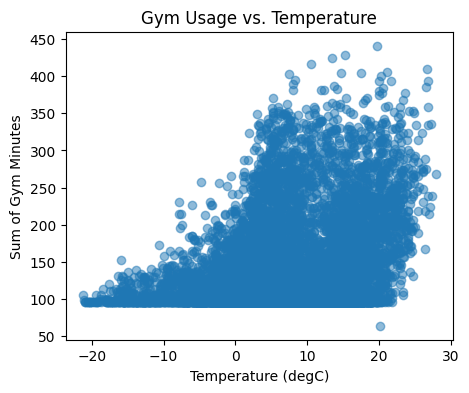

In [23]:
import matplotlib.pyplot as plt

# Assuming 'df_cleaned' is your DataFrame after removing NA values and it has columns 'Temperature (degC)' and 'sum_minutes' for gym usage.
temperature = combined_df['Temperature (degC)']
gym_usage = combined_df['sum_minutes']

# Create scatter plot
plt.figure(figsize=(5, 4))
plt.scatter(temperature, gym_usage, alpha=0.5)

# Adding title and labels
plt.title('Gym Usage vs. Temperature')
plt.xlabel('Temperature (degC)')
plt.ylabel('Sum of Gym Minutes')

# Show plot
plt.show()

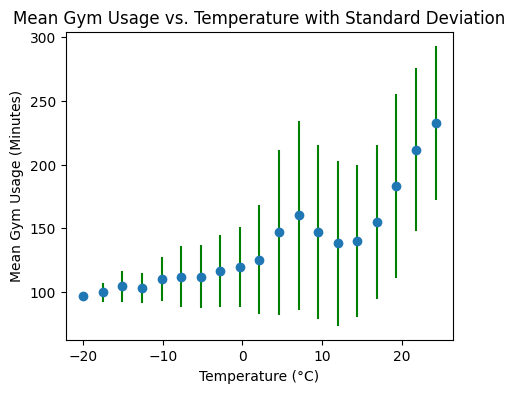

In [24]:
# Bin the temperature data
num_temperature_grid = 20
min_temperature = combined_df['Temperature (degC)'].min()
max_temperature = combined_df['Temperature (degC)'].max()
bin_width = (max_temperature - min_temperature)/num_temperature_grid
temperature_bins = pd.cut(combined_df['Temperature (degC)'], bins=np.arange(min_temperature, max_temperature, bin_width))

# Calculate mean and std of gym usage for each bin
mean_usage_per_temp = combined_df.groupby(temperature_bins)['sum_minutes'].mean()
std_usage_per_temp = combined_df.groupby(temperature_bins)['sum_minutes'].std()
count_per_temp = combined_df.groupby(temperature_bins)['sum_minutes'].count()


# Get the center of each bin for plotting
bin_centers = [(bin.left + bin.right) / 2 for bin in mean_usage_per_temp.index.categories]

# Create plot with error bars
plt.figure(figsize=(5, 4))
plt.errorbar(bin_centers, mean_usage_per_temp, yerr=std_usage_per_temp, fmt='o', ecolor='g', capthick=2)


# Adding titles and labels
plt.title('Mean Gym Usage vs. Temperature with Standard Deviation')
plt.xlabel('Temperature (°C)')
plt.ylabel('Mean Gym Usage (Minutes)')

# Show plot
plt.show()

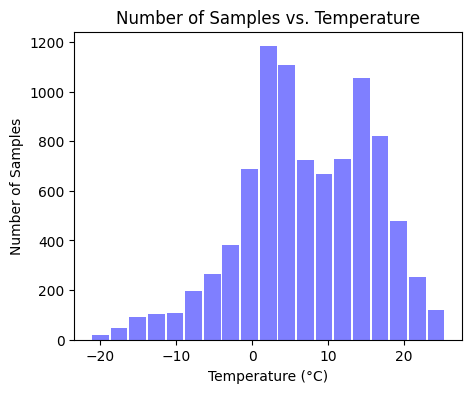

In [25]:
# Bin the temperature data
num_temperature_grid = 20
min_temperature = combined_df['Temperature (degC)'].min()
max_temperature = combined_df['Temperature (degC)'].max()
bin_width = (max_temperature - min_temperature)/num_temperature_grid
temperature_bins = pd.cut(combined_df['Temperature (degC)'], bins=np.arange(min_temperature, max_temperature, bin_width))

# Calculate mean and std of gym usage for each bin
mean_usage_per_temp = combined_df.groupby(temperature_bins)['sum_minutes'].mean()
std_usage_per_temp = combined_df.groupby(temperature_bins)['sum_minutes'].std()
count_per_temp = combined_df.groupby(temperature_bins)['sum_minutes'].count()


# Get the center of each bin for plotting
bin_centers = [(bin.left + bin.right) / 2 for bin in mean_usage_per_temp.index.categories]

# Adding transparent bars for count
plt.figure(figsize=(5, 4))
plt.bar(bin_centers, count_per_temp, width=bin_width * 0.9, alpha=0.5, color='blue', label='Count in Bin')


# Adding titles and labels
plt.title('Number of Samples vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Samples')

# Show plot
plt.show()

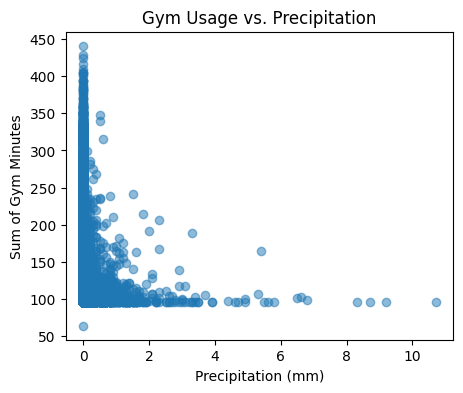

In [33]:
import matplotlib.pyplot as plt

# Assuming 'df_cleaned' is your DataFrame after removing NA values and it has columns 'Precipitation (mm)' and 'sum_minutes' for gym usage.
precipitation = combined_df['Precipitation (mm)']
gym_usage = combined_df['sum_minutes']

# Create scatter plot
plt.figure(figsize=(5, 4))
plt.scatter(precipitation, gym_usage, alpha=0.5)

# Adding title and labels
plt.title('Gym Usage vs. Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Sum of Gym Minutes')

#plt.xscale('log')

# Show plot
plt.show()

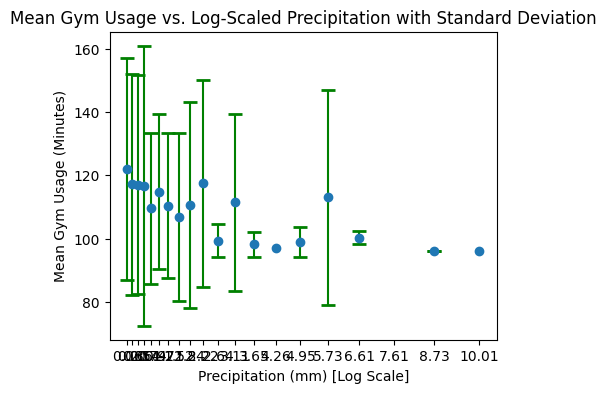

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming combined_df is your DataFrame that has 'Temperature (degC)' and 'sum_minutes'
num_temperature_grid = 20

# Calculate log-scale min and max temperatures
min_log_temperature = np.log1p(combined_df['Precipitation (mm)'].min())
max_log_temperature = np.log1p(combined_df['Precipitation (mm)'].max())

# Create log-scale bins
log_temperature_bins = np.linspace(min_log_temperature, max_log_temperature, num_temperature_grid + 1)
temperature_bins = pd.cut(np.log1p(combined_df['Precipitation (mm)']), bins=log_temperature_bins)

# Calculate mean and std of gym usage for each bin
mean_usage_per_temp = combined_df.groupby(temperature_bins)['sum_minutes'].mean()
std_usage_per_temp = combined_df.groupby(temperature_bins)['sum_minutes'].std()

# Get the center of each bin for plotting, converting back from log-scale for the labels
bin_centers = np.exp(np.array([(bin.left + bin.right) / 2 for bin in mean_usage_per_temp.index.categories])) - 1

# Create plot with error bars
plt.figure(figsize=(5, 4))
plt.errorbar(bin_centers, mean_usage_per_temp, yerr=std_usage_per_temp, fmt='o', ecolor='g', capthick=2, capsize=5)

# Set x-axis to log scale
#plt.xscale('log')

# Adding titles and labels
plt.title('Mean Gym Usage vs. Log-Scaled Precipitation with Standard Deviation')
plt.xlabel('Precipitation (mm) [Log Scale]')
plt.ylabel('Mean Gym Usage (Minutes)')

# Adjust x-axis to properly display log-scaled labels
plt.xticks(bin_centers, labels=[f"{x:.2f}" for x in bin_centers])

plt.show()


Precipitation (mm)
(0.0, 0.535]      119.509855
(0.535, 1.07]     111.293194
(1.07, 1.605]     108.978261
(1.605, 2.14]     111.560000
(2.14, 2.675]     111.133333
(2.675, 3.21]     104.000000
(3.21, 3.745]     109.625000
(3.745, 4.28]      96.000000
(4.28, 4.815]      96.333333
(4.815, 5.35]     101.000000
(5.35, 5.885]     113.000000
(5.885, 6.42]            NaN
(6.42, 6.955]     100.333333
(6.955, 7.49]            NaN
(7.49, 8.025]            NaN
(8.025, 8.56]      96.000000
(8.56, 9.095]      96.000000
(9.095, 9.63]      96.000000
(9.63, 10.165]           NaN
Name: sum_minutes, dtype: float64


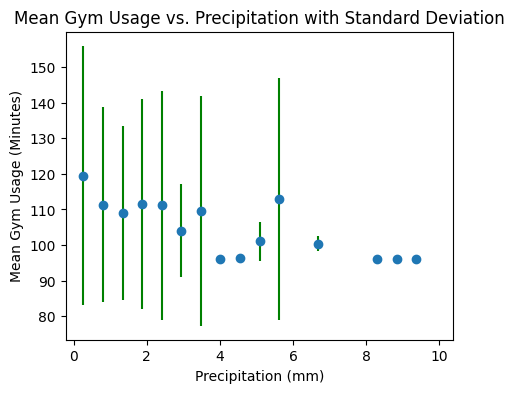

In [39]:
# Bin the temperature data
num_precipitation_grid = 20
min_precipitation = combined_df['Precipitation (mm)'].min()
max_precipitation = combined_df['Precipitation (mm)'].max()
bin_width = (max_precipitation - min_precipitation)/num_precipitation_grid
precipitation_bins = pd.cut(combined_df['Precipitation (mm)'], bins=np.arange(min_precipitation, max_precipitation, bin_width))

# Calculate mean and std of gym usage for each bin
mean_usage = combined_df.groupby(precipitation_bins)['sum_minutes'].mean()
std_usage = combined_df.groupby(precipitation_bins)['sum_minutes'].std()
count_per = combined_df.groupby(precipitation_bins)['sum_minutes'].count()


# Get the center of each bin for plotting
bin_centers = [(bin.left + bin.right) / 2 for bin in mean_usage.index.categories]

# Create plot with error bars
plt.figure(figsize=(5, 4))
plt.errorbar(bin_centers, mean_usage, yerr=std_usage, fmt='o', ecolor='g', capthick=2)
#print(mean_usage)

# Adding titles and labels
plt.title('Mean Gym Usage vs. Precipitation with Standard Deviation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Mean Gym Usage (Minutes)')

# Show plot
plt.show()

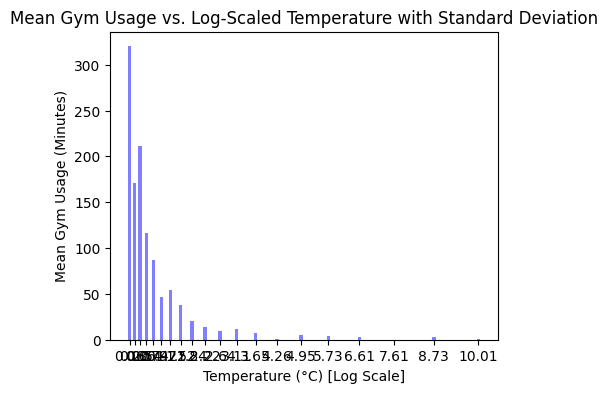

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming combined_df is your DataFrame that has 'Temperature (degC)' and 'sum_minutes'
num_temperature_grid = 20

# Calculate log-scale min and max temperatures
min_log_temperature = np.log1p(combined_df['Precipitation (mm)'].min())
max_log_temperature = np.log1p(combined_df['Precipitation (mm)'].max())

# Create log-scale bins
log_temperature_bins = np.linspace(min_log_temperature, max_log_temperature, num_temperature_grid + 1)
temperature_bins = pd.cut(np.log1p(combined_df['Precipitation (mm)']), bins=log_temperature_bins)

# Calculate mean and std of gym usage for each bin
mean_usage_per_temp = combined_df.groupby(temperature_bins)['sum_minutes'].mean()
std_usage_per_temp = combined_df.groupby(temperature_bins)['sum_minutes'].std()
count_per_temp = combined_df.groupby(temperature_bins)['sum_minutes'].count()


# Get the center of each bin for plotting, converting back from log-scale for the labels
bin_centers = np.exp(np.array([(bin.left + bin.right) / 2 for bin in mean_usage_per_temp.index.categories])) - 1

# Create plot with error bars
plt.figure(figsize=(5, 4))
# Adding transparent bars for count  
bar_width = np.ones_like(bin_centers)*0.1
plt.bar(bin_centers, count_per_temp, width=0.1, alpha=0.5, color='blue', label='Count in Bin')

# Set x-axis to log scale
#plt.xscale('log')

# Adding titles and labels
plt.title('Mean Gym Usage vs. Log-Scaled Temperature with Standard Deviation')
plt.xlabel('Temperature (°C) [Log Scale]')
plt.ylabel('Mean Gym Usage (Minutes)')

# Adjust x-axis to properly display log-scaled labels
plt.xticks(bin_centers, labels=[f"{x:.2f}" for x in bin_centers])

plt.show()


# Bonus Task

In [29]:
import joblib

# Load the pretrained model from the provided file path
model_path = "C:\ML_projecsts\\Tietoevry\\artifacts\\models\\helsinki-gym\\0.0.1\\model.pkl"
model = joblib.load(model_path)

import numpy as np

# Construct the input features array. For example, if we want to predict for a Monday at 14:00 with 0mm precipitation,
# no snow, and a temperature of 10 degrees Celsius, the input array would be:
input_features = np.array([[0, 14, 0.0, 0.0, 10.0]])

# Make the prediction
prediction = model.predict(input_features)

print(prediction)

# Select only the features that the model expects for the prediction
# The features should be in the order: Weekday, Hour, Precipitation, Snow depth, Temperature
# Assuming 'combined_df' is the DataFrame resulting from the previous task and it is already loaded

# Check if we need to convert any data types
combined_df['Precipitation (mm)'] = combined_df['Precipitation (mm)'].astype(float)
combined_df['Snow depth (cm)'] = combined_df['Snow depth (cm)'].astype(float)
combined_df['Temperature (degC)'] = combined_df['Temperature (degC)'].astype(float)


# Extract the features for the model prediction
features = combined_df[['weekday', 'hour', 'Precipitation (mm)', 'Snow depth (cm)', 'Temperature (degC)']]

# Make predictions using the model
predictions = model.predict(features)

# Add predictions as a new attribute to the dataset
combined_df['predictions'] = predictions

# Display the DataFrame with the new predictions attribute
combined_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\ML_projecsts\\Tietoevry\\artifacts\\models\\helsinki-gym\\0.0.1\\model.pkl'

In [ ]:
combined_df

,index,index_weather,Year,Month,Day,Hour,Timezone,Precipitation (mm),Snow depth (cm),Temperature (degC),...,21,22,23,24,25,26,sum_minutes,weekday,hour,predictions
0,2020-04-24 00:00:00+00:00,0,2020,4,24,00:00:00,UTC,0.0,0.0,6.2,...,12,12,12,12,12,12,96,4,0,134.607175
1,2020-04-24 01:00:00+00:00,1,2020,4,24,01:00:00,UTC,0.0,0.0,6.2,...,12,12,12,12,12,12,97,4,1,135.023967
2,2020-04-24 02:00:00+00:00,2,2020,4,24,02:00:00,UTC,0.0,0.0,5.1,...,12,14,12,13,12,13,102,4,2,132.660937
3,2020-04-24 03:00:00+00:00,3,2020,4,24,03:00:00,UTC,0.0,0.0,4.6,...,15,12,18,20,23,20,138,4,3,131.814173
4,2020-04-24 04:00:00+00:00,4,2020,4,24,04:00:00,UTC,0.0,0.0,4.7,...,23,24,19,25,30,28,192,4,4,132.483676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9179,2021-05-11 11:00:00+00:00,9179,2021,5,11,11:00:00,UTC,0.0,0.0,20.3,...,12,12,12,12,12,12,9275,1,11,178.711257
9180,2021-05-11 12:00:00+00:00,9180,2021,5,11,12:00:00,UTC,0.0,0.0,20.4,...,12,12,12,12,12,12,9276,1,12,179.380760
9181,2021-05-11 13:00:00+00:00,9181,2021,5,11,13:00:00,UTC,0.0,0.0,20.8,...,12,12,12,12,12,12,9277,1,13,180.808397
9182,2021-05-11 14:00:00+00:00,9182,2021,5,11,14:00:00,UTC,0.0,0.0,20.8,...,12,12,13,12,12,12,9280,1,14,181.225189


#### 4.1.1 Histogram & KDE

NameError: name 'sns' is not defined

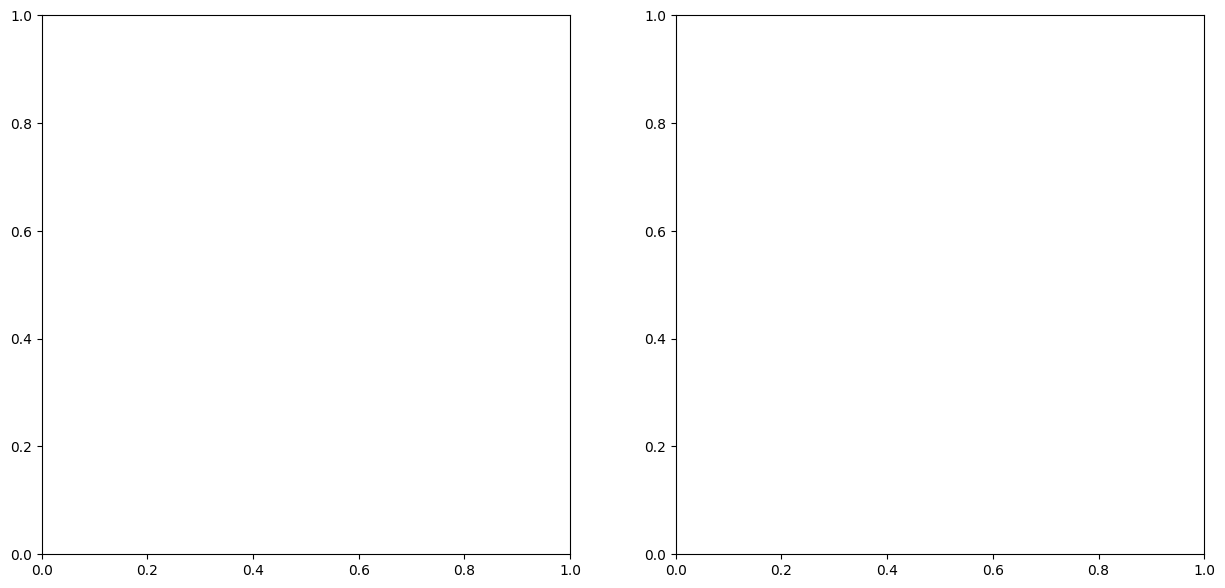

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

In [ ]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [ ]:
gender_group = df.groupby('gender').mean()
gender_group

In [ ]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

In [ ]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

In [ ]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

In [ ]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

In [ ]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.